# Feature Engineering (Precipitation)

In this step, this notebook will document the process used by the team to extract and derive features from RAW data. The common derived data sheds a light on,
- Spread and variance of data
- Averages, median, deviation etc.
- Time disparities of different souces of data
- Overall trends in data
- Correlations between features
etc.

## 1. Setup

In [18]:
# Imports
from PIL import Image
import numpy as np
import pandas as pd

In [19]:
# User Variables & Parameters
# Control Parameters
prec_FileName           = 'prec_'
prec_DataPath           = '../../WaterBucket/data/isb/prec/'
startYear               = 1961
endYear                 = 2018
numYears                = (endYear - startYear) + 1
fromMonth               = 1
toMonth                 = 12

# Processing Parameters
DF                      = pd.DataFrame()
filePathList            = []
fileIdentifier          = []
AVGList                 = []
MedianList              = []
MinList                 = []
MaxList                 = []
VarList                 = []
STDList                 = []

## 2. Reading Files

In [20]:
# Filename generation for batch processing
for y in range(startYear, endYear + 1):
    for m in range(fromMonth, toMonth + 1):

        # Handling case where month name is 01, 02, to 09
        monthName       = ''
        if m < 10:
            monthName   = '0' + str(m)
        else:
            monthName   = str(m)
        
        # Calculaing imagepath and searching if it exists on the system
        fileName        = prec_FileName + str(y) + '-' + str(monthName) + '.tif'
        imagePath       = prec_DataPath + fileName
        identifier      = str(monthName) + '-' + str(y)

        fileIdentifier.append(identifier)
        filePathList.append(imagePath)

In [21]:
# To ensure all filepaths and identifiers are generated correctly
# print(filePathList, fileIdentifier)

## 3. Feature Engineering

In [22]:
for filePath in filePathList:

    # Loading in files one by one
    currentFile         = Image.open(filePath)
    print("Working on: ", filePath)

    # Making derived variables
    npFile              = np.array(currentFile)
    AVGList.append(np.nanmean(npFile))
    MedianList.append(np.nanmedian(npFile))
    MinList.append(np.nanmin(npFile))
    MaxList.append(np.nanmax(npFile))
    VarList.append(np.nanvar(npFile))
    STDList.append(np.nanstd(npFile))

Working on:  ../../WaterBucket/data/isb/prec/prec_1961-01.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1961-02.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1961-03.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1961-04.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1961-05.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1961-06.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1961-07.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1961-08.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1961-09.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1961-10.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1961-11.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1961-12.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1962-01.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1962-02.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1962-03.tif
Working on:  ../../WaterBucket/data/isb/prec/prec_1962-04.tif
Working 

In [23]:
DF['prec_FileName']             = fileIdentifier
DF['prec_AverageValues']        = AVGList
DF['prec_MedianValues']         = MedianList
DF['prec_MinValues']            = MinList
DF['prec_MaxValues']            = MaxList
DF['prec_Variance']             = VarList
DF['prec_StandardDeviation']    = STDList

In [24]:
DF

,prec_FileName,prec_AverageValues,prec_MedianValues,prec_MinValues,prec_MaxValues,prec_Variance,prec_StandardDeviation
0,01-1961,124.336311,124.666229,92.453400,193.782257,236.608475,15.382083
1,02-1961,48.054218,46.615837,36.605957,69.417900,54.186291,7.361134
2,03-1961,37.080849,36.371494,24.608969,55.250587,56.915428,7.544231
3,04-1961,101.938728,98.143433,58.204906,190.751373,777.163147,27.877645
4,05-1961,20.180840,18.558178,13.218128,39.532806,28.996519,5.384841
...,...,...,...,...,...,...,...
691,08-2018,167.790649,167.583145,109.616341,223.756546,651.105103,25.516762
692,09-2018,71.050529,72.789452,48.928478,103.526215,90.268684,9.500983
693,10-2018,14.812920,13.332123,6.623239,35.043839,30.868992,5.555987
694,11-2018,22.134710,20.666344,8.053539,42.342484,74.842873,8.651177


<AxesSubplot:>

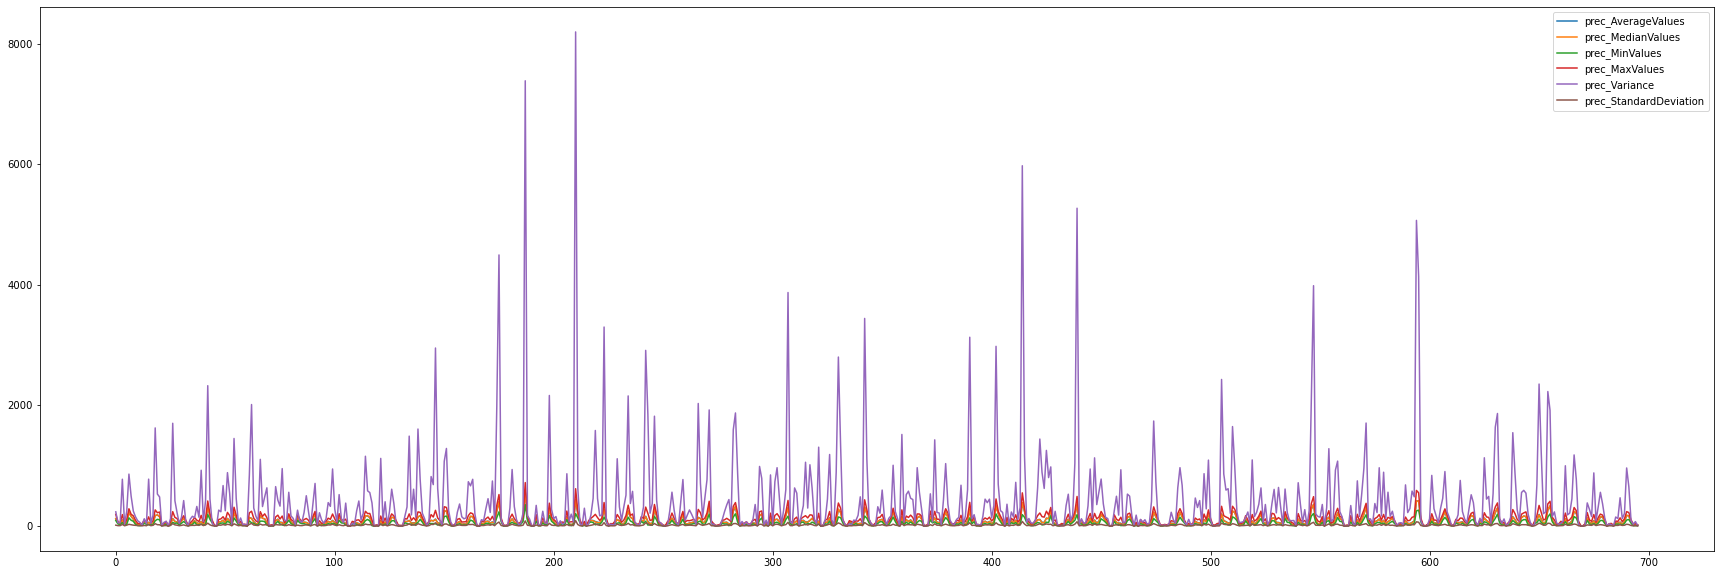

In [30]:
DF.plot.line(figsize=((30,10)))

In [26]:
pd.DataFrame.to_csv(DF, '../output/prec_ISB.csv')